In [2]:
#import dependencies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read csv
df = pd.read_csv('Raw_Data/data_arrhythmia.csv',delimiter = ';')
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [4]:
#Pull variables of interest
new_df = df[['age','sex','height','weight','qrs_duration','p-r_interval','q-t_interval','t_interval','p_interval','qrs','heart_rate','diagnosis']]
new_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8
1,56,1,165,64,81,174,401,149,39,25,53,6
2,54,0,172,95,138,163,386,185,102,96,75,10
3,55,0,175,94,100,202,380,179,143,28,71,1
4,75,0,190,80,88,181,360,177,103,-16,?,7


In [5]:
#Find any null variables
new_df.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
heart_rate      0
diagnosis       0
dtype: int64

In [6]:
#Arrhythmia = 1
new_df['diagnosis'].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

In [7]:
# number of heart arrhythmias not of interest
sum(df['diagnosis']!=1)

207

In [8]:
# Number of Arrhythmia of interest
sum(df['diagnosis']==1)

245

In [9]:
#Set arrhythmia of interest = 1
dummy_df = new_df.join(pd.get_dummies(new_df['diagnosis']==1))
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,False,True
0,75,0,190,80,91,193,371,174,121,-16,63,8,1,0
1,56,1,165,64,81,174,401,149,39,25,53,6,1,0
2,54,0,172,95,138,163,386,185,102,96,75,10,1,0
3,55,0,175,94,100,202,380,179,143,28,71,1,0,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,1,0


In [10]:
#drop false column
dummy_df.drop(columns=[False],axis=1,inplace=True)
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,True
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,0


In [11]:
#Rename True column to Arrhythmia diagnosis
dummy_df.rename(columns={True:'arr_diagnosis'},inplace=True)

In [12]:
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,0


In [13]:
#heart_rate column had string '?', this will remove the string
replaced = dummy_df.replace(['?'],0)

In [14]:
replaced.dtypes

age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
p-r_interval      int64
q-t_interval      int64
t_interval        int64
p_interval        int64
qrs               int64
heart_rate       object
diagnosis         int64
arr_diagnosis     uint8
dtype: object

In [15]:
#change all columns to integer
replaced_df = replaced.astype(int)
replaced_df.dtypes

age              int32
sex              int32
height           int32
weight           int32
qrs_duration     int32
p-r_interval     int32
q-t_interval     int32
t_interval       int32
p_interval       int32
qrs              int32
heart_rate       int32
diagnosis        int32
arr_diagnosis    int32
dtype: object

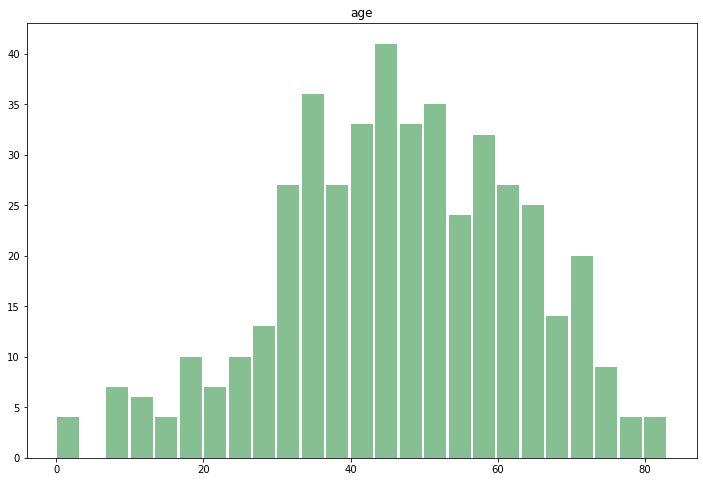

In [16]:
#Distribution of age
ax = replaced_df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

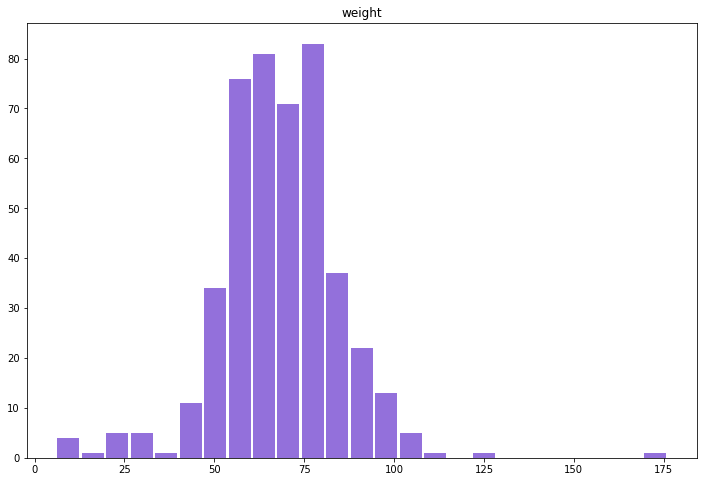

In [29]:
#Distribution of weight
ax = replaced_df.hist(column='weight', bins=25, grid=False, figsize=(12,8), color='mediumpurple', zorder=2, rwidth=0.9)

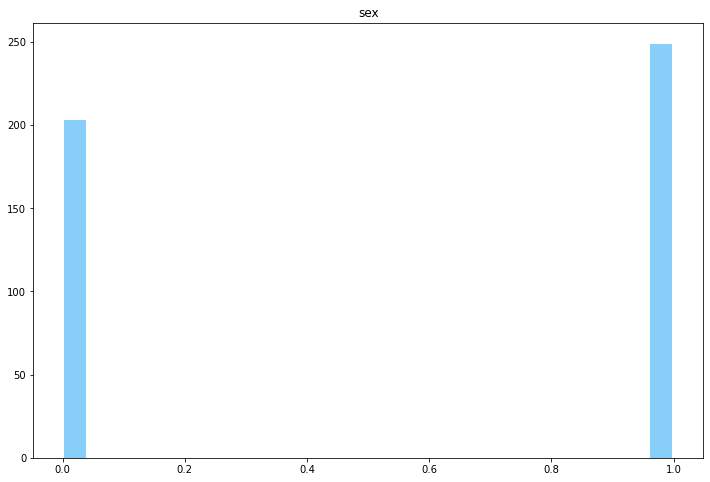

In [26]:
#Distribution of Sex
#Male = 0
#Female = 1
ax = replaced_df.hist(column='sex', bins=25, grid=False, figsize=(12,8), color='lightskyblue', zorder=2, rwidth=0.9)

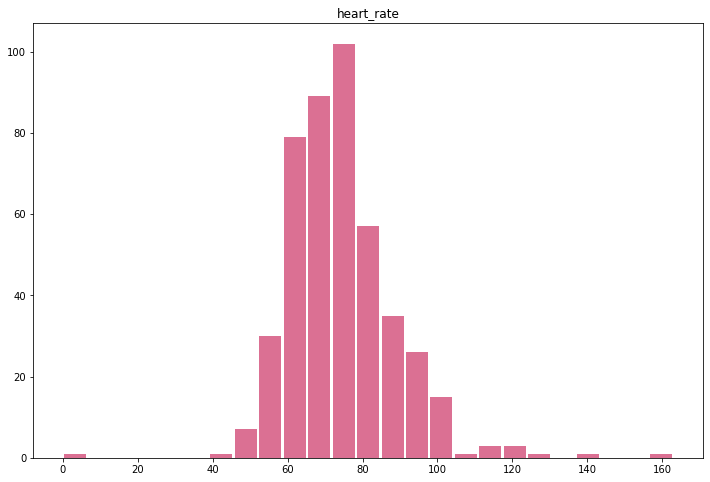

In [19]:
#Distribution of heart rate
ax = replaced_df.hist(column='heart_rate', bins=25, grid=False, figsize=(12,8), color='palevioletred', zorder=2, rwidth=0.9)

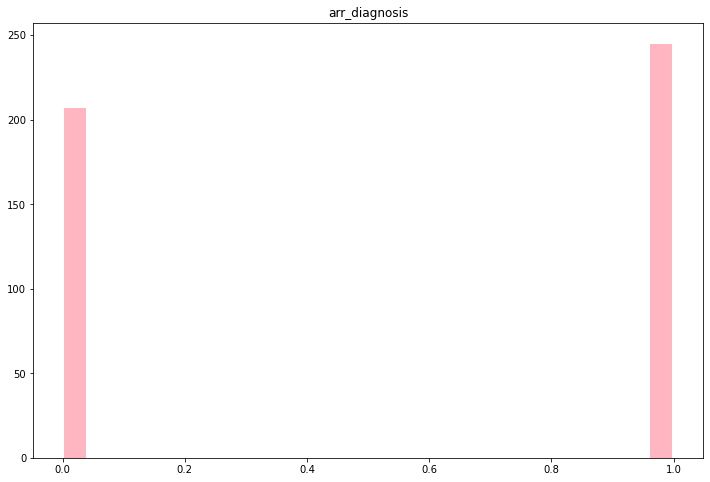

In [25]:
#Distribution of diagnosis of interest
ax = replaced_df.hist(column='arr_diagnosis', bins=25, grid=False, figsize=(12,8), color='lightpink', zorder=2, rwidth=0.9)

In [22]:
import seaborn as sns

<AxesSubplot:>

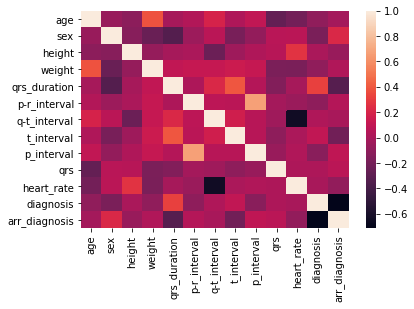

In [23]:
sns.heatmap(replaced_df.corr())

C:\Users\Emily\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

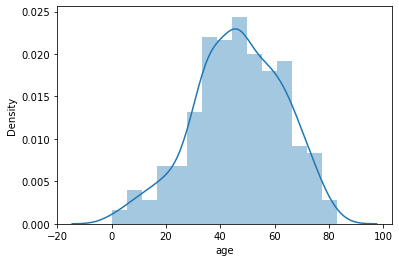

In [30]:
sns.distplot(replaced_df['age'])

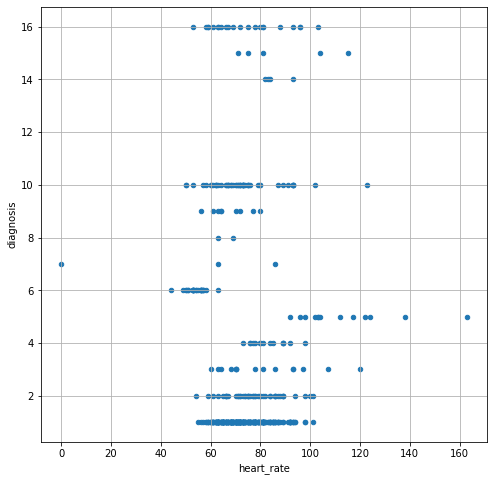

In [25]:
replaced_df.plot(kind="scatter", x="heart_rate", y="diagnosis", grid=True, figsize=(8,8),
              title="")
plt.show()

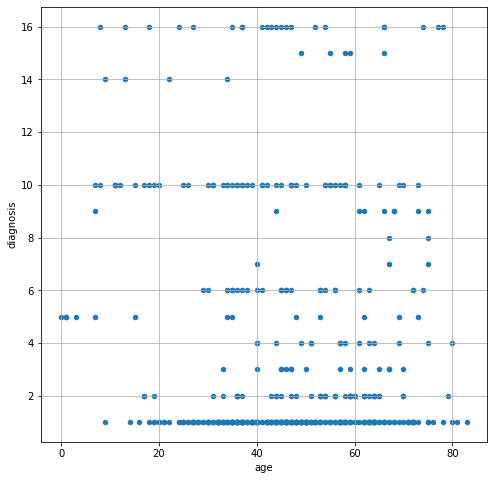

In [26]:
replaced_df.plot(kind="scatter", x="age", y="diagnosis", grid=True, figsize=(8,8),
              title="")
plt.show()

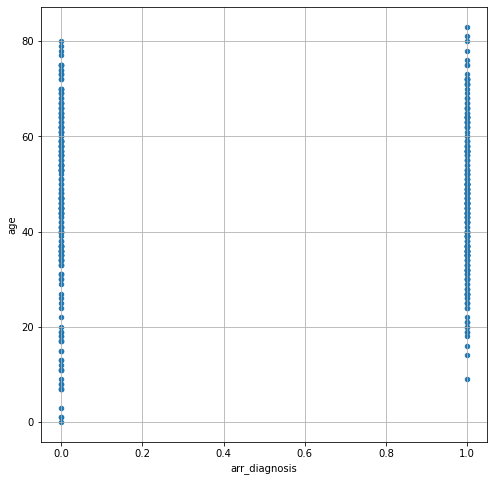

In [27]:
replaced_df.plot(kind="scatter", x="arr_diagnosis", y="age", grid=True, figsize=(8,8),
              title="")
plt.show()

In [29]:
# Use Pandas to read data
clean_data = "clean_data.csv"
clean_data_df = pd.read_csv(clean_data)
clean_data_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
4,75,0,190,80,88,181,360,177,103,-16,0,7,0


In [30]:
# Using GroupBy in order to separate the data into fields according to "sex" values
grouped_sex_df = clean_data_df.groupby(['sex'])

# In order to be visualized, a data function must be used...
grouped_sex_df.count().head(10)

,age,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
sex,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,249,249,249,249,249,249,249,249,249,249,249,249


In [31]:
grouped_sex_df["arr_diagnosis"].sum()

sex
0     85
1    160
Name: arr_diagnosis, dtype: int64

In [32]:
sex_presence = grouped_sex_df["arr_diagnosis"].sum()
sex_presence.head()

sex
0     85
1    160
Name: arr_diagnosis, dtype: int64

In [33]:
# Creating a new DataFrame using presence
sex_summary_df = pd.DataFrame({"Number of Arrhythmias": sex_presence})
sex_summary_df.head()

,Number of Arrhythmias
sex,
0,85
1,160


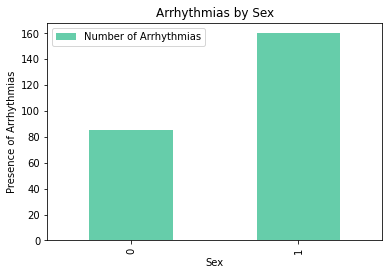

<Figure size 432x288 with 0 Axes>

In [34]:
# Chart our data, give it a title, and label the axes
sex_chart = sex_summary_df.plot(kind="bar", title="Arrhythmias by Sex", color='mediumaquamarine')
sex_chart.set_xlabel("Sex")
sex_chart.set_ylabel("Presence of Arrhythmias")

plt.show()
plt.tight_layout()

In [35]:
colors = ["mediumaquamarine", "cornflowerblue"]

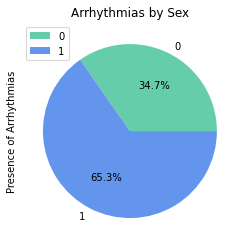

In [36]:
# Create a pie chart based upon the arrhythmia presence for each sex
sex_pie = sex_summary_df.plot(kind="pie", y='Number of Arrhythmias', title=("Arrhythmias by Sex"), colors=colors, autopct="%1.1f%%")
sex_pie.set_ylabel("Presence of Arrhythmias")

plt.show()

In [37]:
# Using GroupBy in order to separate the data into fields according to "sex" values
grouped_age_df = clean_data_df.groupby(['age'])

# In order to be visualized, a data function must be used...
grouped_age_df.count().head(10)

,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
age,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,1,1
7,3,3,3,3,3,3,3,3,3,3,3,3
8,2,2,2,2,2,2,2,2,2,2,2,2
9,2,2,2,2,2,2,2,2,2,2,2,2
11,3,3,3,3,3,3,3,3,3,3,3,3
12,1,1,1,1,1,1,1,1,1,1,1,1
13,2,2,2,2,2,2,2,2,2,2,2,2


In [38]:
grouped_age_df["arr_diagnosis"].sum()

age
0     0
1     0
3     0
7     0
8     0
     ..
78    1
79    0
80    1
81    1
83    1
Name: arr_diagnosis, Length: 77, dtype: int64

In [39]:
age_presence = grouped_age_df["arr_diagnosis"].sum()
age_presence.head()

age
0    0
1    0
3    0
7    0
8    0
Name: arr_diagnosis, dtype: int64

In [40]:
# Creating a new DataFrame using presence
age_summary_df = pd.DataFrame({"Number of Arrhythmias": age_presence})
age_summary_df

,Number of Arrhythmias
age,
0,0
1,0
3,0
7,0
8,0
...,...
78,1
79,0
80,1


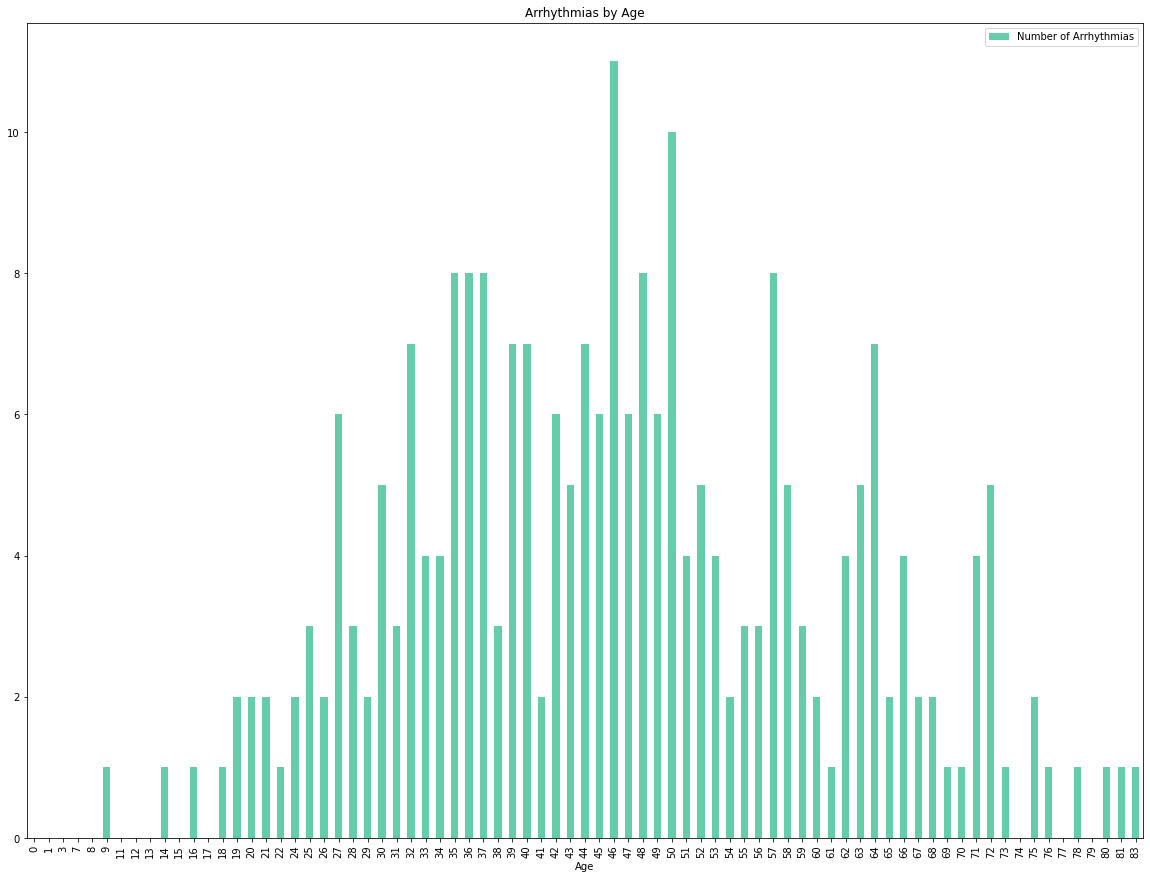

In [41]:
# Chart our data, give it a title, and label the axes
age_chart = age_summary_df.plot(kind="bar", title="Arrhythmias by Age", color='mediumaquamarine', figsize=(20,15))
age_chart.set_xlabel("Age")
sex_chart.set_ylabel("Presence of Arrhythmias")

plt.show()